In [2]:
#Librerias usadas en la prueba
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from matplotlib import pyplot
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [4]:
block0= pd.read_csv('block_0.csv')
#block0= pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/daily_dataset/block_0.csv')


In [5]:
block0.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [6]:
energy = pd.read_csv('energy.csv')
#energy = pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/daily_dataset/energy.csv')
len(energy)

3536007

In [7]:
energy.head()

,Unnamed: 0,day,LCLid,energy_sum
0,0,2012-10-12,MAC000002,7.098
1,1,2012-10-13,MAC000002,11.087
2,2,2012-10-14,MAC000002,13.223
3,3,2012-10-15,MAC000002,10.257
4,4,2012-10-16,MAC000002,9.769


In [8]:
energy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
energy['day']=pd.to_datetime(energy['day'])

In [10]:
energy.set_index('day', inplace=True)

In [11]:
energy.head()

,LCLid,energy_sum
day,,
2012-10-12,MAC000002,7.098
2012-10-13,MAC000002,11.087
2012-10-14,MAC000002,13.223
2012-10-15,MAC000002,10.257
2012-10-16,MAC000002,9.769


In [12]:
print("Starting Point of Data at Day Level",min(energy.index))
print("Ending Point of Data at Day Level",max(energy.index))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-28 00:00:00


In [14]:
a=energy.loc['2011-11-23']

In [15]:
b=energy.loc['2014-02-28']

In [18]:
c=pd.merge(a, b,  on='LCLid', how='inner')

In [19]:
c

,LCLid,energy_sum_x,energy_sum_y
0,MAC000155,9.281,0.218
1,MAC000150,9.254,0.113
2,MAC000152,5.969,0.123
3,MAC000153,21.702,2.249
4,MAC000145,8.952,0.167
5,MAC000148,1.283,0.141
6,MAC000149,2.287,0.000
7,MAC000156,6.523,0.161
8,MAC000147,3.036,0.048
9,MAC000151,3.273,0.026


In [ ]:
#Se seleccionan las 11 casas que tienen registro del consumo desde el primer dia que presenta el dataset

In [20]:
casa1=energy[['energy_sum']][energy['LCLid']=='MAC000155']

In [21]:
casa2=energy[['energy_sum']][energy['LCLid']=='MAC000150']

In [22]:
casa3=energy[['energy_sum']][energy['LCLid']=='MAC000152']

In [23]:
casa4=energy[['energy_sum']][energy['LCLid']=='MAC000145']

In [24]:
casa5=energy[['energy_sum']][energy['LCLid']=='MAC000149']

In [25]:
casa6=energy[['energy_sum']][energy['LCLid']=='MAC000156']

In [26]:
casa7=energy[['energy_sum']][energy['LCLid']=='MAC000147']

In [27]:
casa8=energy[['energy_sum']][energy['LCLid']=='MAC000151']

In [28]:
casa9=energy[['energy_sum']][energy['LCLid']=='MAC000153']

In [29]:
casa10=energy[['energy_sum']][energy['LCLid']=='MAC000148']

In [30]:
casa11=energy[['energy_sum']][energy['LCLid']=='MAC000157']

In [31]:
casa1.head()

,energy_sum
day,
2011-11-23,9.281
2011-11-24,14.481
2011-11-25,13.689
2011-11-26,16.080
2011-11-27,16.060


In [32]:
len(casa1)

829

In [33]:
len(casa11)

829

In [0]:
print("Starting Point of Data at Day Level",min(casa1.index))
print("Ending Point of Data at Day Level",max(casa1.index))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-28 00:00:00


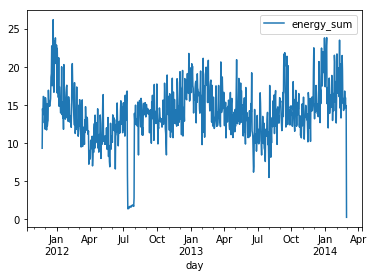

In [34]:
#Comportamiento del consumo de una casa durante el periodo registrado por el dataset
casa1.plot()

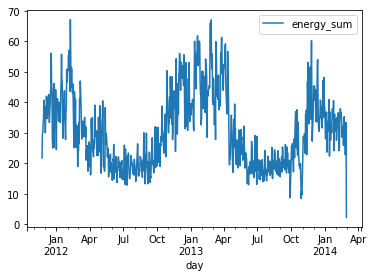

In [44]:
#Comportamiento del consumo de una casa durante el periodo registrado por el dataset
casa9.plot()

In [42]:
len(casa7)

829

In [47]:
houses1=pd.merge(casa1, casa2,  on='day', how='inner')

In [48]:
houses2=pd.merge(casa3, casa4,  on='day', how='inner')

In [49]:
houses3=pd.merge(casa5, casa6,  on='day', how='inner')

In [50]:
houses4=pd.merge(casa7, casa8,  on='day', how='inner')

In [51]:
houses5=pd.merge(casa9, casa10,  on='day', how='inner')

In [52]:
houses1.head()

,energy_sum_x,energy_sum_y
day,,
2011-11-23,9.281,9.254
2011-11-24,14.481,9.606
2011-11-25,13.689,12.685
2011-11-26,16.080,9.606
2011-11-27,16.060,14.387


In [54]:
houses6=pd.merge(houses1, houses2,  on='day', how='inner')

In [55]:
houses7=pd.merge(houses3, houses4,  on='day', how='inner')

In [56]:
houses8=pd.merge(houses5, casa11,  on='day', how='inner')

In [57]:
houses9=pd.merge(houses6, houses7,  on='day', how='inner')

In [60]:
houses10=pd.merge(houses8, houses9,  on='day', how='inner')

In [61]:
houses10.head()

,energy_sum_x,energy_sum_y,energy_sum,energy_sum_x_x_x,energy_sum_y_x_x,energy_sum_x_y_x,energy_sum_y_y_x,energy_sum_x_x_y,energy_sum_y_x_y,energy_sum_x_y_y,energy_sum_y_y_y
day,,,,,,,,,,,
2011-11-23,21.702,1.283,7.408,9.281,9.254,5.969,8.952,2.287,6.523,3.036,3.273
2011-11-24,29.722,2.304,14.258,14.481,9.606,8.394,12.135,4.331,12.689,7.489,4.620
2011-11-25,30.071,2.324,14.818,13.689,12.685,7.898,13.720,4.373,10.717,6.185,4.783
2011-11-26,33.384,2.295,11.265,16.080,9.606,9.074,15.234,4.335,12.442,6.964,4.935
2011-11-27,34.204,2.302,12.328,16.060,14.387,9.421,13.189,4.375,12.964,7.912,4.553


In [62]:
houses10.dtypes

energy_sum_x        float64
energy_sum_y        float64
energy_sum          float64
energy_sum_x_x_x    float64
energy_sum_y_x_x    float64
energy_sum_x_y_x    float64
energy_sum_y_y_x    float64
energy_sum_x_x_y    float64
energy_sum_y_x_y    float64
energy_sum_x_y_y    float64
energy_sum_y_y_y    float64
dtype: object

In [63]:
houses10.index

DatetimeIndex(['2011-11-23', '2011-11-24', '2011-11-25', '2011-11-26',
               '2011-11-27', '2011-11-28', '2011-11-29', '2011-11-30',
               '2011-12-01', '2011-12-02',
               ...
               '2014-02-19', '2014-02-20', '2014-02-21', '2014-02-22',
               '2014-02-23', '2014-02-24', '2014-02-25', '2014-02-26',
               '2014-02-27', '2014-02-28'],
              dtype='datetime64[ns]', name='day', length=829, freq=None)

In [64]:
houses10.columns = ['house1','house2','house3', 'house4','house5','house6','house7','house8','house9','house10', 'house11']

In [65]:
houses10.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11
day,,,,,,,,,,,
2011-11-23,21.702,1.283,7.408,9.281,9.254,5.969,8.952,2.287,6.523,3.036,3.273
2011-11-24,29.722,2.304,14.258,14.481,9.606,8.394,12.135,4.331,12.689,7.489,4.620
2011-11-25,30.071,2.324,14.818,13.689,12.685,7.898,13.720,4.373,10.717,6.185,4.783
2011-11-26,33.384,2.295,11.265,16.080,9.606,9.074,15.234,4.335,12.442,6.964,4.935
2011-11-27,34.204,2.302,12.328,16.060,14.387,9.421,13.189,4.375,12.964,7.912,4.553


In [66]:
houses10['consumo_agregado'] = houses10.sum(axis=1)

In [67]:
houses10.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
day,,,,,,,,,,,,
2011-11-23,21.702,1.283,7.408,9.281,9.254,5.969,8.952,2.287,6.523,3.036,3.273,78.968
2011-11-24,29.722,2.304,14.258,14.481,9.606,8.394,12.135,4.331,12.689,7.489,4.620,120.029
2011-11-25,30.071,2.324,14.818,13.689,12.685,7.898,13.720,4.373,10.717,6.185,4.783,121.263
2011-11-26,33.384,2.295,11.265,16.080,9.606,9.074,15.234,4.335,12.442,6.964,4.935,125.614
2011-11-27,34.204,2.302,12.328,16.060,14.387,9.421,13.189,4.375,12.964,7.912,4.553,131.695


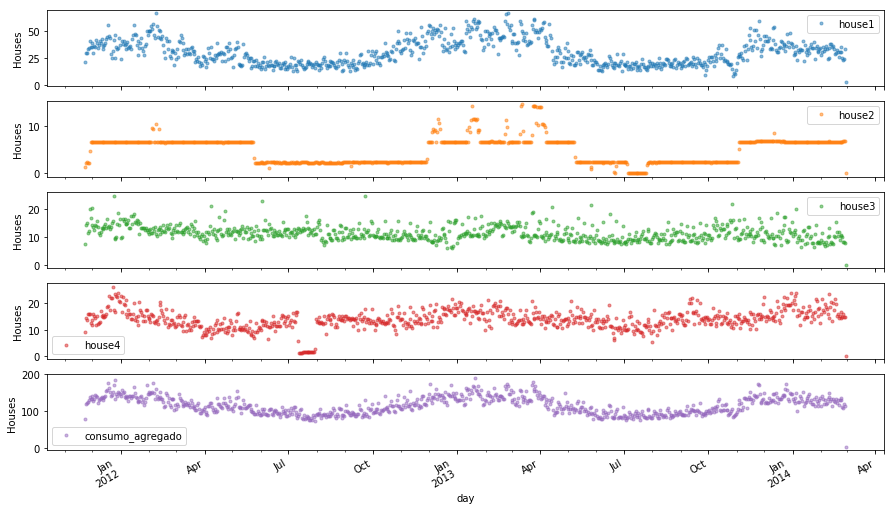

In [69]:
##Comportamiento del consumo de  varias casas durante el periodo registrado por el dataset
cols_plot = ['house1', 'house2', 'house3', 'house4', 'consumo_agregado']
axes = houses10[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Houses')

In [70]:
#Matriz de correlación del consumo de las casa seleccionadas
houses10.corr()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
house1,1.000000,0.710162,0.176365,0.384923,0.236169,0.246491,0.366362,0.110363,0.380518,0.030102,0.476601,0.875132
house2,0.710162,1.000000,0.156492,0.309238,0.210137,0.220290,0.318087,0.341002,0.265124,0.082043,0.385054,0.736394
house3,0.176365,0.156492,1.000000,0.140952,0.273502,0.061771,0.053299,0.223086,0.025908,0.234639,0.128021,0.351126
house4,0.384923,0.309238,0.140952,1.000000,0.281928,0.124719,0.358781,-0.039767,0.370228,0.067605,0.318435,0.575699
house5,0.236169,0.210137,0.273502,0.281928,1.000000,0.085318,0.173312,0.136011,0.201932,0.278656,0.141657,0.486366
house6,0.246491,0.220290,0.061771,0.124719,0.085318,1.000000,0.123029,0.111247,0.149350,0.063338,0.145321,0.441751
house7,0.366362,0.318087,0.053299,0.358781,0.173312,0.123029,1.000000,-0.097397,0.271083,-0.004987,0.271487,0.518657
house8,0.110363,0.341002,0.223086,-0.039767,0.136011,0.111247,-0.097397,1.000000,-0.045232,0.323995,0.059776,0.233800
house9,0.380518,0.265124,0.025908,0.370228,0.201932,0.149350,0.271083,-0.045232,1.000000,-0.027980,0.322189,0.475426
house10,0.030102,0.082043,0.234639,0.067605,0.278656,0.063338,-0.004987,0.323995,-0.027980,1.000000,-0.045587,0.212946


In [73]:
df1=houses10[['consumo_agregado']]

In [74]:
df1.head()

,consumo_agregado
day,
2011-11-23,78.968
2011-11-24,120.029
2011-11-25,121.263
2011-11-26,125.614
2011-11-27,131.695


In [76]:
#Cargar dataset de clima
clima=pd.read_csv("weather_daily_darksky.csv")
#clima=pd.read_csv("gdrive/My Drive/Colab Notebooks/Proyecto/daily_dataset/weather_daily_darksky.csv")

In [77]:
clima.head(2)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53


In [78]:
clima.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [79]:
#clima.dtypes

In [80]:
clima['day']=  pd.to_datetime(clima['time']) # day is given as timestamp
clima['day']=  pd.to_datetime(clima['day'],format='%Y%m%d').dt.date

In [81]:
clima.dtypes

temperatureMax                 float64
temperatureMaxTime              object
windBearing                      int64
icon                            object
dewPoint                       float64
temperatureMinTime              object
cloudCover                     float64
windSpeed                      float64
pressure                       float64
apparentTemperatureMinTime      object
apparentTemperatureHigh        float64
precipType                      object
visibility                     float64
humidity                       float64
apparentTemperatureHighTime     object
apparentTemperatureLow         float64
apparentTemperatureMax         float64
uvIndex                        float64
time                            object
sunsetTime                      object
temperatureLow                 float64
temperatureMin                 float64
temperatureHigh                float64
sunriseTime                     object
temperatureHighTime             object
uvIndexTime              

In [82]:
clima1=clima[['temperatureMax', 'windSpeed', 'humidity', 'day']]

In [83]:
clima1.dtypes

temperatureMax    float64
windSpeed         float64
humidity          float64
day                object
dtype: object

In [84]:
clima1['day']=  pd.to_datetime(clima1['day']) 

C:\Users\Dayana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
clima1.dtypes

temperatureMax           float64
windSpeed                float64
humidity                 float64
day               datetime64[ns]
dtype: object

In [86]:
clima1.set_index('day', inplace=True)

In [87]:
clima1.head()

,temperatureMax,windSpeed,humidity
day,,,
2011-11-11,11.96,3.88,0.95
2011-12-11,8.59,3.94,0.88
2011-12-27,10.33,3.54,0.74
2011-12-02,8.07,3.00,0.87
2011-12-24,8.22,4.46,0.80


In [88]:
clima1.dtypes

temperatureMax    float64
windSpeed         float64
humidity          float64
dtype: object

In [89]:
clima1.index.month.unique()

Int64Index([11, 12, 5, 7, 9, 1, 4, 2, 8, 3, 6, 10], dtype='int64', name='day')

In [90]:
#Dataset usado en la prueba que registra el consumo energético y los datos climatológicos por día
df=pd.merge(df1, clima1, on='day')

In [91]:
df.head()

,consumo_agregado,temperatureMax,windSpeed,humidity
day,,,,
2011-11-23,78.968,10.36,2.04,0.93
2011-11-24,120.029,12.93,4.04,0.89
2011-11-25,121.263,13.03,5.02,0.79
2011-11-26,125.614,12.96,5.75,0.81
2011-11-27,131.695,13.54,5.48,0.72


In [94]:
len(df)

829

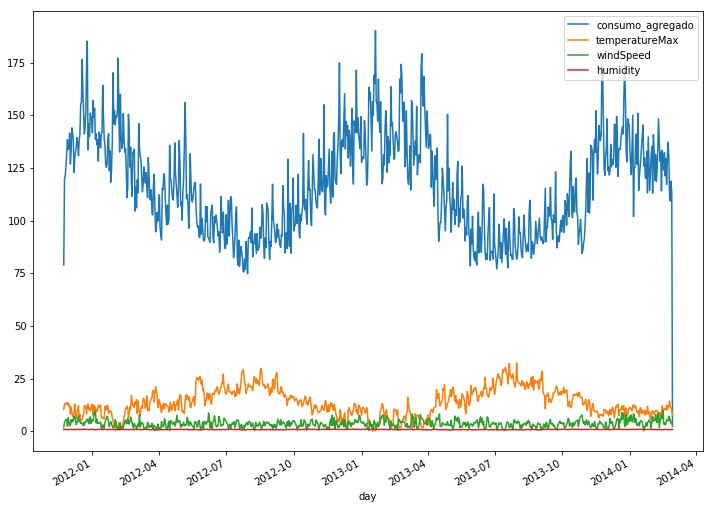

In [95]:
#Visualización de las variables del dataset
df.plot(figsize=(12, 9))

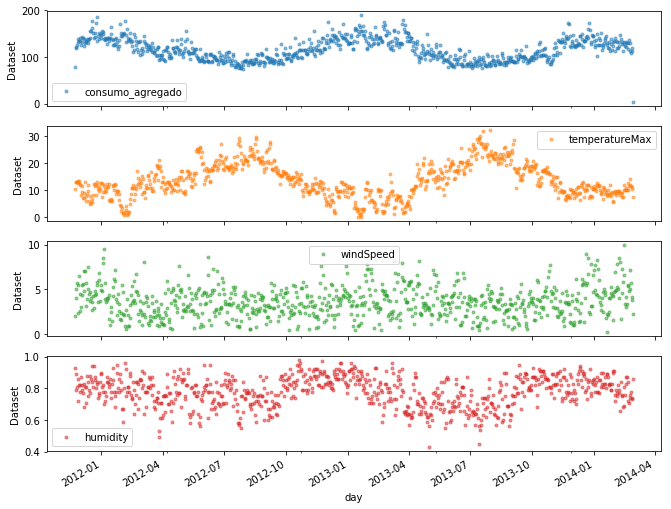

In [96]:
#Visualización de los datos
cols_plot = ['consumo_agregado', 'temperatureMax', 'windSpeed', 'humidity']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Dataset')

In [97]:
matrizcorrelacion = df.corr()

In [98]:
matrizcorrelacion

,consumo_agregado,temperatureMax,windSpeed,humidity
consumo_agregado,1.000000,-0.774438,0.158224,0.301133
temperatureMax,-0.774438,1.000000,-0.154118,-0.405068
windSpeed,0.158224,-0.154118,1.000000,-0.040131
humidity,0.301133,-0.405068,-0.040131,1.000000


In [99]:
print("Starting Point of Data at Day Level",min(df1.index))
print("Ending Point of Data at Day Level",max(df1.index))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-28 00:00:00


In [0]:

#https://github.com/ShashwatArghode/Wind-Energy-Prediction-using-LSTM/blob/master/Exp1-Estimation-8%20look%20backs%2070-30%20split.ipynb

In [101]:
df.head()

,consumo_agregado,temperatureMax,windSpeed,humidity
day,,,,
2011-11-23,78.968,10.36,2.04,0.93
2011-11-24,120.029,12.93,4.04,0.89
2011-11-25,121.263,13.03,5.02,0.79
2011-11-26,125.614,12.96,5.75,0.81
2011-11-27,131.695,13.54,5.48,0.72


In [102]:
dataset = df.values
dataset = dataset.astype('float32')


In [103]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [104]:
dataset

array([[0.40431684, 0.32101044, 0.18852457, 0.9090909 ],
       [0.6241801 , 0.4001848 , 0.3934426 , 0.83636355],
       [0.6307876 , 0.4032655 , 0.49385247, 0.6545454 ],
       ...,
       [0.61760473, 0.34966108, 0.3709016 , 0.5454546 ],
       [0.5874854 , 0.3194701 , 0.4036885 , 0.5636364 ],
       [0.        , 0.22828095, 0.20901638, 0.78181815]], dtype=float32)

In [105]:
''' Dividiendo los datos en training y test '''
#dataset = df1.values
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

580 249


In [106]:
train

array([[0.40431684, 0.32101044, 0.18852457, 0.9090909 ],
       [0.6241801 , 0.4001848 , 0.3934426 , 0.83636355],
       [0.6307876 , 0.4032655 , 0.49385247, 0.6545454 ],
       ...,
       [0.4186938 , 0.54220575, 0.6741803 , 0.690909  ],
       [0.47996596, 0.5104744 , 0.62295085, 0.5999999 ],
       [0.52502453, 0.49784347, 0.40573767, 0.4181819 ]], dtype=float32)

In [107]:
'''Función para crear tramas de tiempo con look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [108]:
''' Crear tramas de tiempo con look backs '''
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

575
244


In [109]:
trainX.shape

(575, 5, 4)

In [110]:
testY.shape

(244,)

In [111]:
trainX[0]

array([[0.40431684, 0.32101044, 0.18852457, 0.9090909 ],
       [0.6241801 , 0.4001848 , 0.3934426 , 0.83636355],
       [0.6307876 , 0.4032655 , 0.49385247, 0.6545454 ],
       [0.6540853 , 0.40110904, 0.56864756, 0.690909  ],
       [0.68664634, 0.41897717, 0.5409836 , 0.5272728 ]], dtype=float32)

In [112]:
testY[0]

0.41884372

In [113]:
trainY[0]

0.7230786

In [244]:
''' Re-shaping los datos para los requerimientos del modelo'''
trainX = np.reshape(trainX, (trainX.shape[0], 5, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 5, testX.shape[2]))

Train on 575 samples, validate on 244 samples
Epoch 1/400
 - 2s - loss: 0.1045 - val_loss: 0.0386
Epoch 2/400
 - 0s - loss: 0.0299 - val_loss: 0.0095
Epoch 3/400
 - 0s - loss: 0.0130 - val_loss: 0.0083
Epoch 4/400
 - 0s - loss: 0.0094 - val_loss: 0.0095
Epoch 5/400
 - 0s - loss: 0.0076 - val_loss: 0.0067
Epoch 6/400
 - 0s - loss: 0.0066 - val_loss: 0.0069
Epoch 7/400
 - 0s - loss: 0.0062 - val_loss: 0.0069
Epoch 8/400
 - 0s - loss: 0.0060 - val_loss: 0.0069
Epoch 9/400
 - 0s - loss: 0.0059 - val_loss: 0.0068
Epoch 10/400
 - 0s - loss: 0.0058 - val_loss: 0.0066
Epoch 11/400
 - 0s - loss: 0.0057 - val_loss: 0.0064
Epoch 12/400
 - 0s - loss: 0.0056 - val_loss: 0.0063
Epoch 13/400
 - 0s - loss: 0.0055 - val_loss: 0.0062
Epoch 14/400
 - 0s - loss: 0.0055 - val_loss: 0.0061
Epoch 15/400
 - 0s - loss: 0.0054 - val_loss: 0.0060
Epoch 16/400
 - 0s - loss: 0.0053 - val_loss: 0.0059
Epoch 17/400
 - 0s - loss: 0.0053 - val_loss: 0.0058
Epoch 18/400
 - 0s - loss: 0.0052 - val_loss: 0.0057
Epoch 19/

Epoch 154/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 155/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 156/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 157/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 158/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 159/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 160/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 161/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 162/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 163/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 164/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 165/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 166/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 167/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 168/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 169/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 170/400
 - 0s - loss: 0.0040 - val_loss: 0.0055
Epoch 171/400
 - 0s - loss: 0.0040 - val_loss: 0.0054
Epoch 172/400
 - 0s - loss: 

Epoch 306/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 307/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 308/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 309/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 310/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 311/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 312/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 313/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 314/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 315/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 316/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 317/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 318/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 319/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 320/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 321/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 322/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 323/400
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 324/400
 - 0s - loss: 

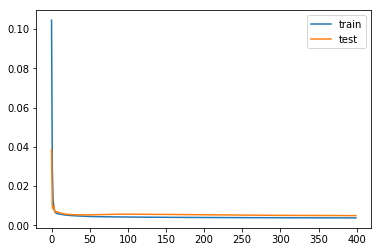

In [245]:
''' Ajustando los datos al Modelo LSTM '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1],trainX.shape[2] )))
#model.add(LSTM(units=15, return_sequences=True))
#model.add(LSTM(units=15))
#model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs=400, batch_size=50, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [246]:
''' Haciendo la predicción una vez el modelo entrenado '''
yhat = model.predict(testX)

yhat[0:5]

array([[0.42417175],
       [0.42268458],
       [0.5202038 ],
       [0.47628877],
       [0.4500664 ]], dtype=float32)

In [247]:
yhat.shape

(244, 1)

In [248]:
testY.shape

(244,)

In [249]:
testY[0:5]

array([0.41884372, 0.5847599 , 0.45756787, 0.44096875, 0.41565242],
      dtype=float32)

In [250]:
testY[0]

0.41884372

In [251]:
len(testY)

244

In [252]:
# Devolviendo los datos a su escala original
#create empty table with 4 fields
testPredict_dataset_like = np.zeros(shape=(len(yhat), 4) )
# put the predicted values in the right field
testPredict_dataset_like[:,0] = yhat[:,0]


In [253]:
# inverse transform and then select the right field
testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,0]

In [254]:
len(testPredict)

244

In [255]:
testY.shape

(244,)

In [256]:
testPredict[0:5]

array([ 82.6760434 ,  82.3983048 , 100.61070726,  92.40926176,
        87.51204907])

In [257]:
# Devolviendo los datos a su escala original
#create empty table with 4 fields
testY_dataset_like = np.zeros(shape=(len(testY), 4) )
# put the predicted values in the right field
testY_dataset_like[:,0] = testY[:]
# inverse transform and then select the right field
testYnormal = scaler.inverse_transform(testY_dataset_like)[:,0]

In [258]:
testYnormal.shape

(244,)

In [259]:
testYnormal[0:5]

array([ 81.68099661, 112.66700386,  88.91300353,  85.8130019 ,
        81.08500043])

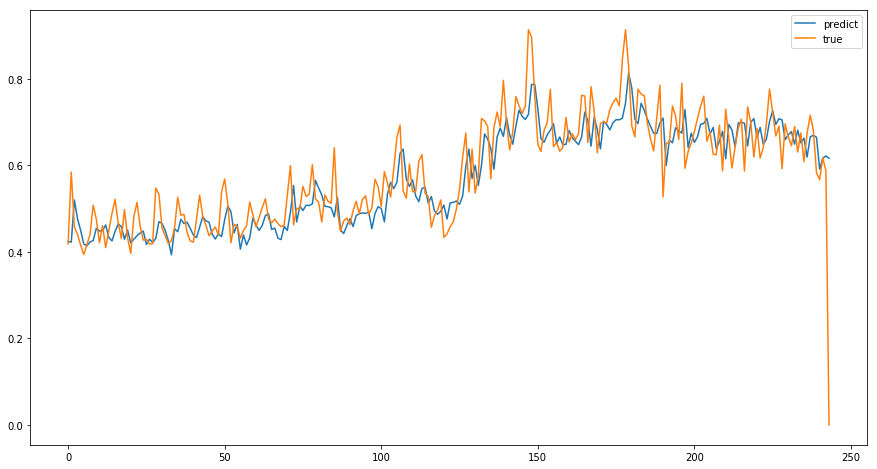

In [260]:
''' Plotting las predicciones '''
pyplot.figure(figsize=(15,8))
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

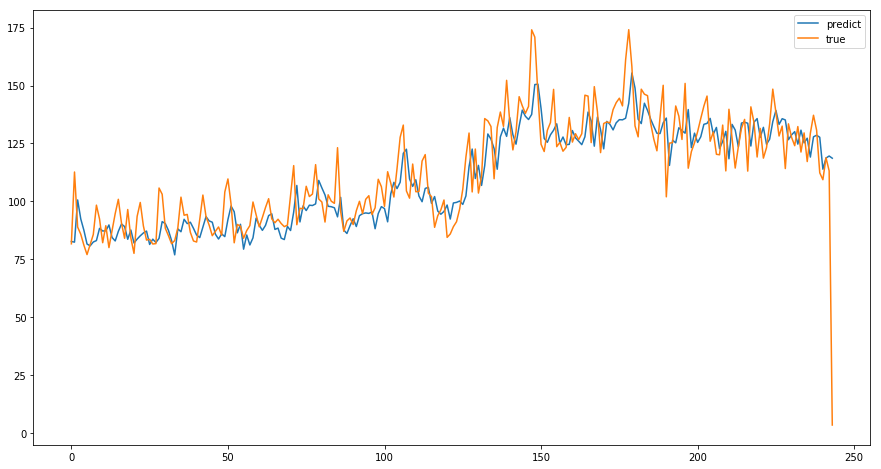

In [261]:
''' Plotting las predicciones'''
pyplot.figure(figsize=(15,8))
pyplot.plot(testPredict, label='predict')
pyplot.plot(testYnormal, label='true')
pyplot.legend()
pyplot.show()

In [262]:
print("Mean squared error: %.3f" % mean_squared_error(testYnormal, testPredict))

Mean squared error: 170.640


In [263]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testYnormal, testPredict)))

Root mean squared error: 13.063


In [264]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testYnormal, testPredict))

Variance : 0.670


In [265]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.3f" % mean_absolute_error(testYnormal, testPredict))

Mean absolute error: 8.654
